In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
import matplotlib.cm as cm
colormap = cm.get_cmap("hsv")

C:\Users\alexk\AppData\Local\Temp\ipykernel_21012\2988994069.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("hsv")


In [2]:
m20_v20_L3_s2_trial5=torch.tensor([[[100.0000,  82.1066,  49.6001,  21.4997,   1.1551,  69.5640],
         [100.0000,  88.1185,  36.7938,  28.8060,   4.2464,  90.6680],
         [ 99.8405,  87.5512,  43.6206,  27.9281,   2.8819,  93.3860],
         [ 99.8151,  88.9099,  39.4783,  18.2751,   2.7497,  96.5920],
         [ 99.8092,  83.4634,  51.7446,  13.3333,   1.7403,  98.5380],
         [ 99.8264,  85.5746,  44.9069,  10.0000,  15.1840,  99.1880],
         [ 99.8304,  85.4124,  38.4005,   0.0000,   0.0000,  99.5380],
         [ 99.8313,  79.9342,  28.2837,  20.0000,   0.0000,  99.6680],
         [ 99.8838,  85.0317,  30.3333,   0.0000,   0.0000,  99.8160],
         [ 99.9339,  93.0556,  31.6667,   0.0000,   0.0000,  99.9140]],

        [[100.0000,  78.1721,  47.4353,  18.1390,   3.5737,  37.4980],
         [ 98.2050,  81.0684,  43.3550,  21.6039,   5.5164,  61.9140],
         [ 98.5467,  78.9111,  42.4107,  19.1562,   4.8908,  74.4820],
         [ 98.6574,  75.0898,  35.6369,  13.4737,   5.7016,  83.6940],
         [ 99.1721,  78.0747,  35.5622,  16.7364,   4.6799,  90.7260],
         [ 99.3763,  77.6399,  35.1907,  17.9579,   5.4408,  94.6940],
         [ 99.6204,  77.1103,  33.1532,  17.6632,   6.4682,  97.1120],
         [ 99.7176,  76.5634,  29.3924,  19.8990,   7.5556,  98.3980],
         [ 99.8188,  80.8784,  39.9229,  10.0000,   0.0000,  99.3440],
         [ 99.8568,  72.9863,  28.6840,  20.0000,   0.0000,  99.5560]],

        [[100.0000,  88.8707,  61.1779,  24.7539,   4.4405,  10.5700],
         [ 99.0520,  80.6978,  45.5479,  17.9155,   4.6560,  18.0180],
         [ 87.5238,  62.2445,  31.5618,  13.5550,   5.1246,  25.4480],
         [ 88.4627,  55.5586,  27.1326,  10.9373,   5.0654,  35.0780],
         [ 94.1310,  63.6599,  30.3551,  11.1642,   5.6652,  53.9340],
         [ 96.7247,  67.1295,  31.9375,  13.0170,   5.9073,  70.1340],
         [ 98.5454,  74.3962,  38.1948,  18.0751,   8.8225,  84.2940],
         [ 99.5065,  84.5895,  51.6857,  28.5380,  14.0203,  93.8480],
         [ 99.8789,  91.5356,  64.6293,  44.2073,  30.5238,  98.1620],
         [ 99.9662,  94.3584,  74.4582,  46.4371,  20.0000,  99.4460]],

        [[  0.0000,  60.0000,  60.0265,  25.0816,   4.9499,   5.5020],
         [ 40.0000,  83.3106,  51.0360,  19.3309,   4.7997,   6.3960],
         [ 73.6869,  47.1029,  27.5088,  12.7358,   4.7945,   7.2060],
         [ 67.2778,  42.3734,  23.5504,  10.6140,   5.1226,  10.2780],
         [ 70.5161,  39.5840,  20.9490,   8.8567,   4.9377,  15.8520],
         [ 76.0572,  41.8840,  20.0639,   9.6560,   5.3184,  27.5680],
         [ 92.0672,  62.5909,  34.2718,  17.0482,   9.2260,  56.4960],
         [ 99.7053,  94.1851,  78.5567,  60.1623,  34.9578,  92.1740],
         [ 99.9708,  98.8762,  94.3546,  87.1024,  73.2272,  99.2120],
         [ 99.9821,  99.4555,  97.1130,  92.7133,  60.0000,  99.8700]],

        [[  0.0000,   0.0000,  38.6667,  20.0553,   4.8947,   4.9680],
         [  0.0000,  40.0000,  67.9048,  20.1698,   4.9858,   5.2120],
         [  0.0000,  13.3333,  28.0906,  14.0669,   4.9761,   5.3900],
         [ 70.0000,  38.4957,  25.4610,  10.4149,   4.7777,   5.7220],
         [ 55.3500,  30.9438,  16.8959,   8.5993,   5.0639,   6.9700],
         [ 34.6957,  20.4913,  12.8592,   6.9243,   4.7296,   8.3160],
         [ 43.8766,  23.5378,  13.7309,   8.4190,   5.7514,  15.7240],
         [ 99.7454,  97.8652,  91.5256,  81.9732,  68.9941,  93.9740],
         [ 99.9846,  99.7267,  98.9118,  97.3502,  93.7368,  99.7460],
         [ 99.9956,  99.9100,  99.5680,  98.6667,  40.0000,  99.9800]],

        [[  0.0000,   0.0000,  40.0000,  26.6667,   5.0442,   5.0660],
         [  0.0000,   0.0000,  10.0000,  24.6693,   4.9691,   5.0120],
         [  0.0000,   0.0000,  34.6667,  14.7488,   5.1265,   5.2000],
         [  0.0000,   0.0000,  34.2316,  11.5169,   4.9739,   5.1380],
         [ 20.0000,  20.0000,  18.5324,   9.7690,   4.8670,   5.2820],
         [  0.0000,  22.5759,  13.9093,   7.5715,   5.0941,   5.8060],
         [ 18.3866,   9.6076,   7.8161,   5.8345,   5.1183,   5.8520],
         [  9.4698,   8.1470,   7.3178,   6.5219,   4.9307,   7.1820],
         [ 99.9822,  99.9653, 100.0000, 100.0000, 100.0000,  99.9780],
         [100.0000, 100.0000,  60.0000,   0.0000,   0.0000, 100.0000]]])


m20_v20_L3_s2_trial5_test_size=torch.tensor([[[5.5726e+03, 1.0386e+03, 9.8680e+02, 7.6800e+01, 2.3252e+03],
         [7.8058e+03, 1.1240e+03, 7.0220e+02, 4.6400e+01, 3.2160e+02],
         [8.3650e+03, 8.7260e+02, 4.8420e+02, 2.7600e+01, 2.5060e+02],
         [9.1106e+03, 5.1620e+02, 2.5680e+02, 1.1800e+01, 1.0460e+02],
         [9.6420e+03, 2.1760e+02, 9.0800e+01, 3.6000e+00, 4.6000e+01],
         [9.7924e+03, 1.3420e+02, 5.8800e+01, 8.0000e-01, 1.3800e+01],
         [9.9054e+03, 6.6000e+01, 2.2800e+01, 6.0000e-01, 5.2000e+00],
         [9.9562e+03, 3.0000e+01, 1.1000e+01, 4.0000e-01, 2.4000e+00],
         [9.9804e+03, 1.3400e+01, 4.4000e+00, 0.0000e+00, 1.8000e+00],
         [9.9906e+03, 7.0000e+00, 2.0000e+00, 2.0000e-01, 2.0000e-01]],

        [[1.3202e+03, 1.5560e+03, 1.9136e+03, 9.8580e+02, 4.2244e+03],
         [3.1380e+03, 2.3884e+03, 2.1116e+03, 7.2160e+02, 1.6404e+03],
         [4.9620e+03, 2.2608e+03, 1.5544e+03, 3.7360e+02, 8.4920e+02],
         [6.7684e+03, 1.7386e+03, 9.6280e+02, 1.6940e+02, 3.6080e+02],
         [7.9480e+03, 1.2366e+03, 5.7280e+02, 8.7200e+01, 1.5540e+02],
         [8.8142e+03, 7.5980e+02, 3.1020e+02, 3.7600e+01, 7.8200e+01],
         [9.3282e+03, 4.6880e+02, 1.5700e+02, 1.9800e+01, 2.6200e+01],
         [9.6340e+03, 2.7060e+02, 7.7800e+01, 9.2000e+00, 8.4000e+00],
         [9.8214e+03, 1.4820e+02, 2.7200e+01, 2.0000e+00, 1.2000e+00],
         [9.9172e+03, 6.7200e+01, 1.3200e+01, 1.8000e+00, 6.0000e-01]],

        [[2.1000e+01, 1.0100e+02, 4.8140e+02, 1.1854e+03, 8.2112e+03],
         [1.1960e+02, 5.0020e+02, 1.3746e+03, 2.1094e+03, 5.8962e+03],
         [6.1160e+02, 1.2920e+03, 2.3098e+03, 2.1424e+03, 3.6442e+03],
         [1.4974e+03, 2.1440e+03, 2.5800e+03, 1.7154e+03, 2.0632e+03],
         [3.0716e+03, 2.6042e+03, 2.1824e+03, 1.0952e+03, 1.0466e+03],
         [4.8920e+03, 2.5006e+03, 1.5510e+03, 6.3380e+02, 4.2260e+02],
         [6.6254e+03, 1.9864e+03, 9.1780e+02, 3.3140e+02, 1.3900e+02],
         [7.9414e+03, 1.4018e+03, 4.9680e+02, 1.2500e+02, 3.5000e+01],
         [8.9166e+03, 8.1760e+02, 2.1900e+02, 4.1400e+01, 5.4000e+00],
         [9.4602e+03, 4.5020e+02, 7.7000e+01, 1.1600e+01, 1.0000e+00]],

        [[0.0000e+00, 1.0000e+00, 2.7200e+01, 1.9880e+02, 9.7730e+03],
         [8.0000e-01, 1.2200e+01, 1.1700e+02, 6.4980e+02, 9.2202e+03],
         [8.6000e+00, 6.2200e+01, 4.0760e+02, 1.4706e+03, 8.0510e+03],
         [6.6000e+01, 3.2880e+02, 1.2002e+03, 2.3768e+03, 6.0282e+03],
         [4.0480e+02, 1.1038e+03, 2.1284e+03, 2.6306e+03, 3.7324e+03],
         [1.3994e+03, 2.0880e+03, 2.5742e+03, 2.1276e+03, 1.8108e+03],
         [3.2022e+03, 2.6658e+03, 2.2020e+03, 1.2698e+03, 6.6020e+02],
         [5.4338e+03, 2.4764e+03, 1.3778e+03, 5.4160e+02, 1.7040e+02],
         [7.5326e+03, 1.7110e+03, 6.0220e+02, 1.2980e+02, 2.4400e+01],
         [8.9516e+03, 8.4720e+02, 1.8020e+02, 1.9400e+01, 1.6000e+00]],

        [[0.0000e+00, 0.0000e+00, 3.4000e+00, 4.2800e+01, 9.9538e+03],
         [0.0000e+00, 4.0000e-01, 7.2000e+00, 1.2040e+02, 9.8720e+03],
         [0.0000e+00, 8.0000e-01, 3.1400e+01, 3.7400e+02, 9.5938e+03],
         [1.2000e+00, 1.5400e+01, 1.3940e+02, 1.0582e+03, 8.7858e+03],
         [1.4000e+01, 1.0860e+02, 6.6320e+02, 2.1806e+03, 7.0336e+03],
         [1.5560e+02, 6.5620e+02, 1.7374e+03, 3.0844e+03, 4.3664e+03],
         [9.9200e+02, 1.8934e+03, 2.6898e+03, 2.5674e+03, 1.8574e+03],
         [3.2182e+03, 2.9160e+03, 2.2562e+03, 1.2196e+03, 3.9000e+02],
         [6.4920e+03, 2.3426e+03, 9.0300e+02, 2.2600e+02, 3.6400e+01],
         [8.9862e+03, 8.6900e+02, 1.3120e+02, 1.3200e+01, 4.0000e-01]],

        [[0.0000e+00, 0.0000e+00, 6.0000e-01, 7.6000e+00, 9.9918e+03],
         [0.0000e+00, 0.0000e+00, 8.0000e-01, 2.1600e+01, 9.9776e+03],
         [0.0000e+00, 0.0000e+00, 2.6000e+00, 7.2600e+01, 9.9248e+03],
         [0.0000e+00, 0.0000e+00, 7.6000e+00, 2.2140e+02, 9.7710e+03],
         [2.0000e-01, 6.0000e-01, 3.9400e+01, 7.2220e+02, 9.2376e+03],
         [6.0000e-01, 1.6000e+01, 2.3420e+02, 1.9284e+03, 7.8208e+03],
         [1.3800e+01, 2.1340e+02, 1.2836e+03, 3.8044e+03, 4.6848e+03],
         [5.2060e+02, 2.1930e+03, 3.6110e+03, 2.8154e+03, 8.6000e+02],
         [5.5852e+03, 3.4546e+03, 8.6220e+02, 9.4200e+01, 3.8000e+00],
         [9.9268e+03, 7.2600e+01, 6.0000e-01, 0.0000e+00, 0.0000e+00]]])



ptr_list=torch.tensor([3.1623e+01, 1.0000e+02, 3.1623e+02, 1.0000e+03, 3.1623e+03, 1.0000e+04,
        3.1623e+04, 1.0000e+05, 3.1623e+05, 1.0000e+06], dtype=torch.float64)



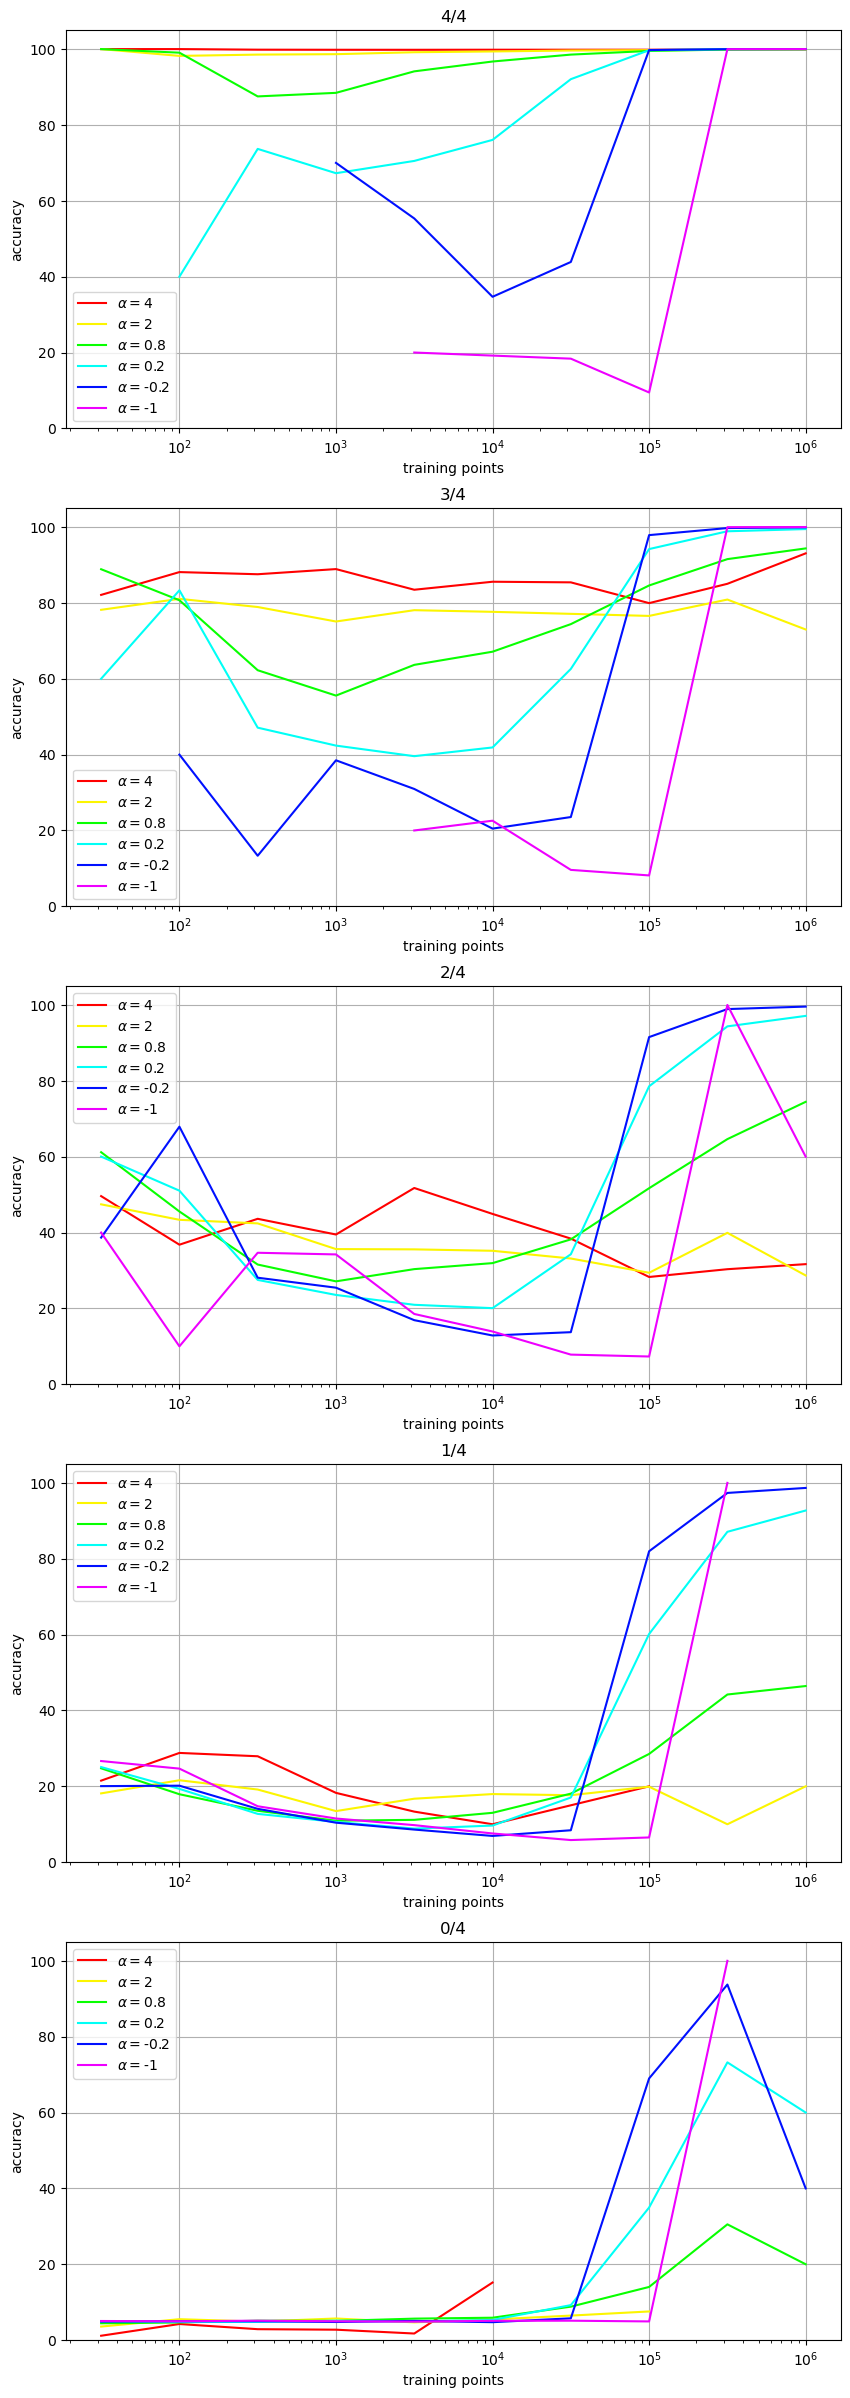

In [7]:
fig, axis = plt.subplots(5, 1, figsize=(10, 30))
temperature_list = [4, 2, 0.8, 0.2, -0.2, -1]
title_list = ["4/4", "3/4", "2/4", "1/4", "0/4"]
for i in range(5):  #i is how much path you see
    for j in range(6):  #j is how much temperature you see
        data = m20_v20_L3_s2_trial5[j, :, i].numpy()
        non_zero_indices = np.where(data != 0)[0]
        axis[i].semilogx(ptr_list[non_zero_indices], data[non_zero_indices], color=colormap(j/6), label=r"$\alpha=$"+f'{temperature_list[j]}')
    axis[i].legend()
    axis[i].set_ylim(0, 105)
    axis[i].set_title(title_list[i])
    axis[i].grid()
    axis[i].set_xlabel("training points")
    axis[i].set_ylabel("accuracy")


C:\Users\alexk\AppData\Local\Temp\ipykernel_21012\3719599843.py:8: RuntimeWarning: divide by zero encountered in log
  marker_size = np.log(m20_v20_L3_s2_trial5_test_size[j, :, i].numpy())


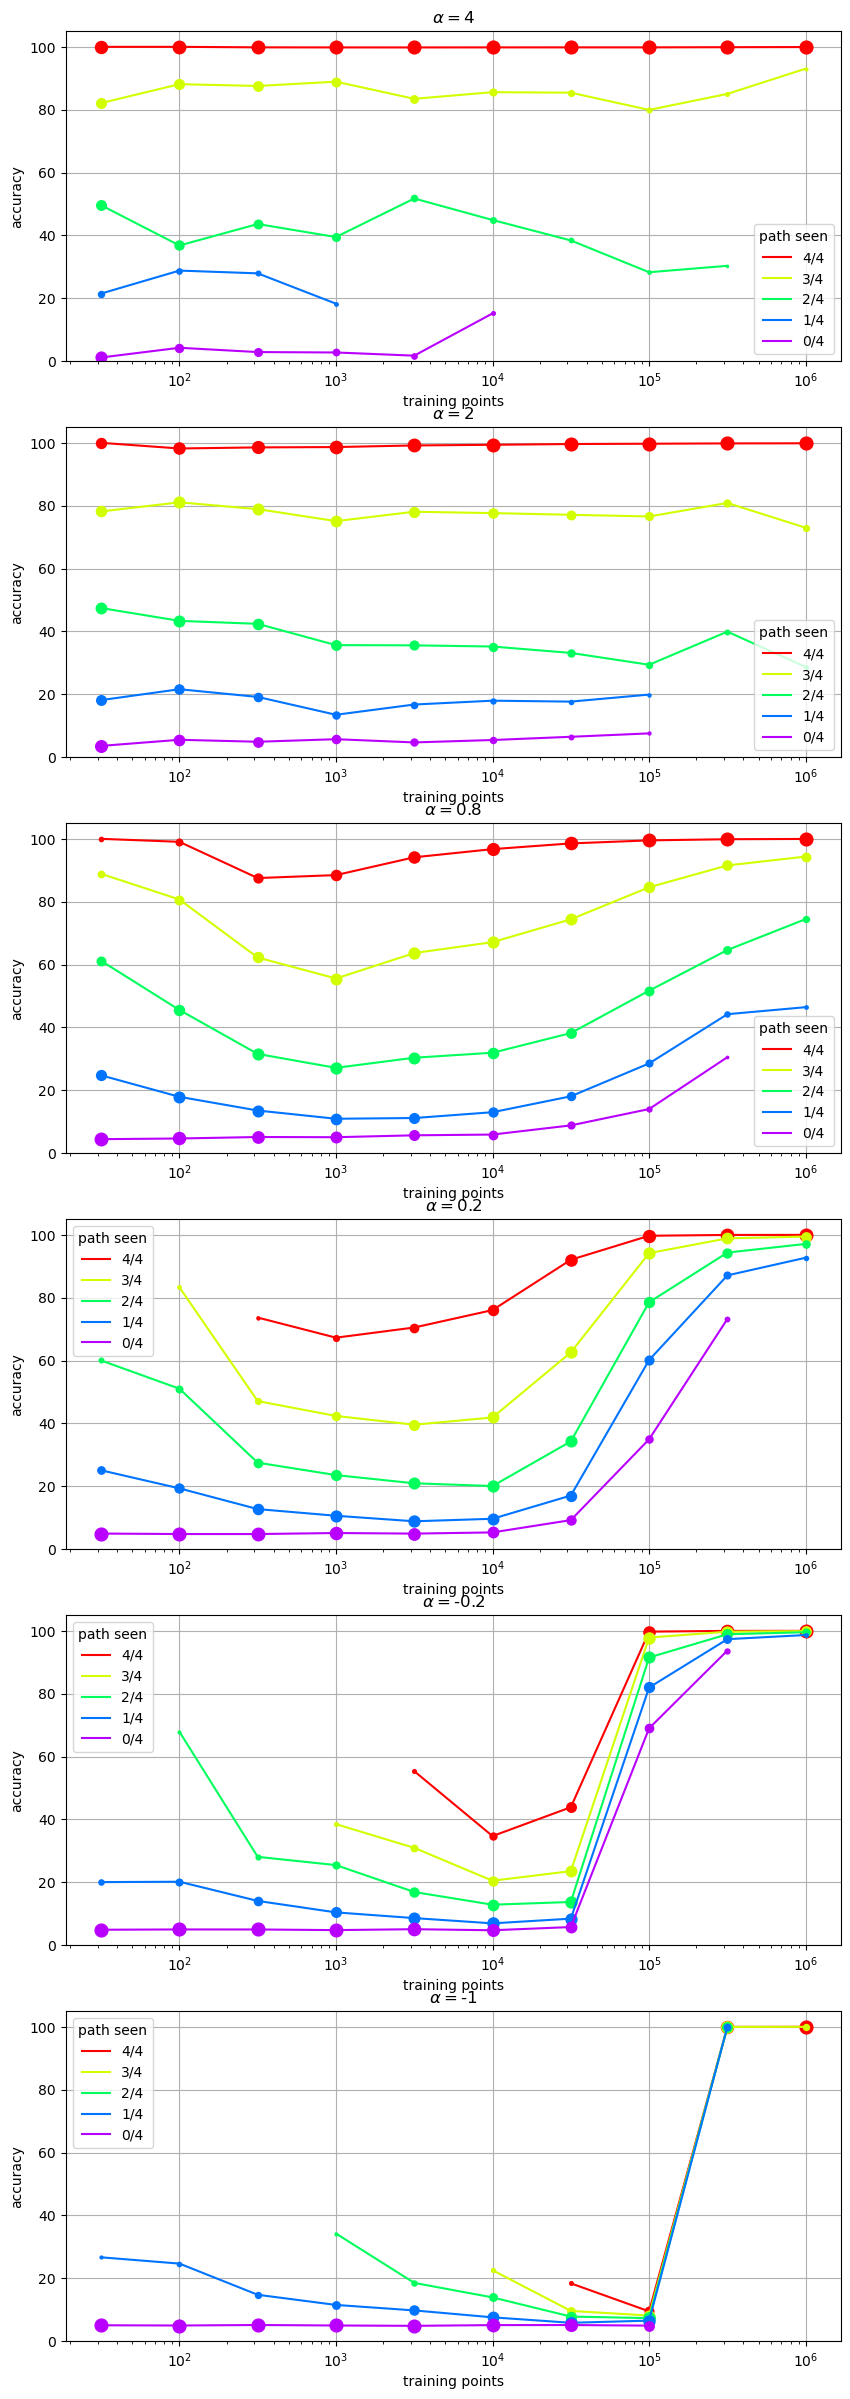

In [9]:
fig, axis = plt.subplots(6, 1, figsize=(10, 30))
temperature_list = [4, 2, 0.8, 0.2, -0.2, -1]
# title_list = ["4/4", "3/4", "2/4", "2/4 in same", "1/4", "0/4"]
title_list = ["4/4", "3/4", "2/4", "1/4", "0/4"]
for j in range(6):
    for i in range(5):
        data = m20_v20_L3_s2_trial5[j, :, i].numpy()
        marker_size = np.log(m20_v20_L3_s2_trial5_test_size[j, :, i].numpy())
        non_zero_indices = np.where(data != 0)[0]
        bigger_indices = np.where(m20_v20_L3_s2_trial5_test_size[j, :, i] > 4)[0]
        non_zero_indices = np.intersect1d(non_zero_indices, bigger_indices)
        axis[j].semilogx(ptr_list[non_zero_indices], data[non_zero_indices], color=colormap(i/5),label=title_list[i])
        for idx in non_zero_indices:
            axis[j].semilogx(ptr_list[idx], data[idx], color=colormap(i/5),  markersize=marker_size[idx], marker='o')
    axis[j].set_ylim(0, 105)
    axis[j].set_title(r"$\alpha=$"+f"{temperature_list[j]}")
    axis[j].grid()  
    axis[j].set_xlabel("training points")
    axis[j].set_ylabel("accuracy")
    axis[j].legend(title="path seen")
    
    marker_sizes = [5, 4, 3, 2, 1]  # Marker sizes
    corresponding_values = [100, 50, 30, 20, 10]
    for size, value in zip(marker_sizes, corresponding_values):
        axis[j].scatter([], [], s=size**2, label=f'{value}', alpha=0.5)  # Marker size is squared for better visibility



    